# Preprocessing

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os
os.chdir('/content/gdrive/MyDrive/Napoli Elective')


Mounted at /content/gdrive


In [ ]:
!ls

GASTRIC_METAPLASIA  GASTRIC_METAPLASIA.zip  ProgNapoli.ipynb


In [ ]:
# !unzip -P eai20232024 GASTRIC_METAPLASIA.zip

In [5]:
os.chdir('/content/gdrive/MyDrive/Napoli Elective/GASTRIC_METAPLASIA')


In [6]:
# !mv read-roi read_roi
!pip show read_roi

In [ ]:
# !pip install read-roi

In [7]:
from data import *

In [ ]:
!ls

constants.py	data	 gem				      __pycache__  read_roi
custom_dataset	data.py  Histopatological_class_1852512.pptx  readme.md    roi_utils.py


In [ ]:
d = ImgDataset('train')

In [ ]:
import cv2

In [ ]:
# Function to overlay mask on the image
# Function to overlay mask on the image with alpha blending
def overlay_mask(image, mask, alpha=0.3):
    # Assuming mask values are 0, 1, and 2
    mask_colors = [
        np.array([0, 0, 0]),  # Black for class 0
        np.array([0, 0, 255]),  # Green for class 1
        np.array([255, 0, 0])   # Red for class 2
    ]

    overlay = image.copy()
    for class_val in range(1, 3):  # Assuming classes start from 1
        overlay[mask == class_val] = (
            alpha * mask_colors[class_val] + (1 - alpha) * overlay[mask == class_val]
        )

    return overlay

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterate through the first 9 images in your dataset
for i in range(9):
    # Get image and mask matrices
    image_matrix, mask_matrix = next(d)
    mask_matrix = mask_matrix[:,:,0]
    # Overlay mask on the image
    overlayed = overlay_mask(image_matrix, mask_matrix)

    # Plot the original image
    axes[i // 3, i % 3].imshow(image_matrix, cmap='gray')
    axes[i // 3, i % 3].set_title(f"Image {i+1}")

    # Plot the overlayed image with mask
    axes[i // 3, i % 3].imshow(overlayed)

    # Turn off axis labels
    axes[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

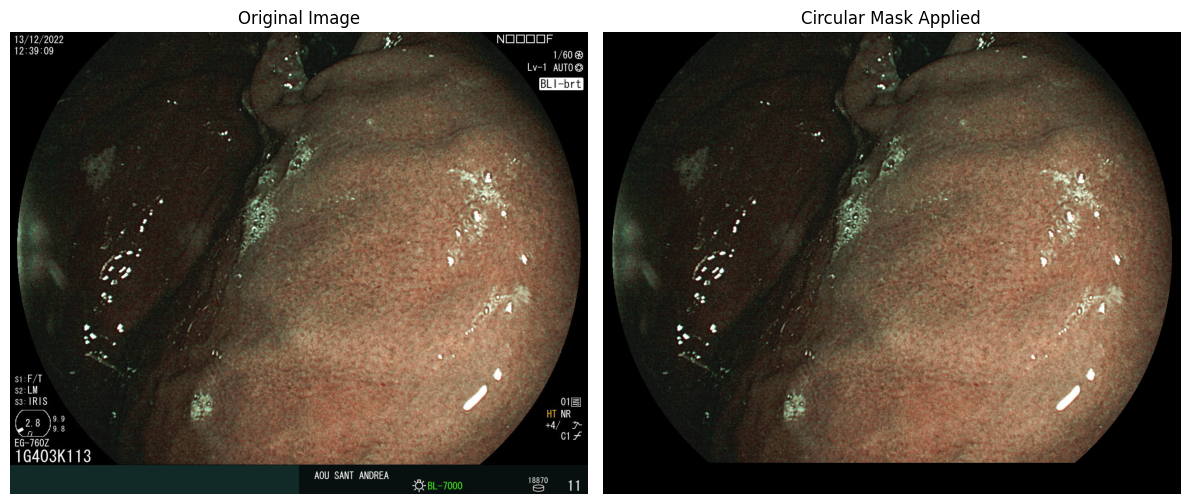

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_circular_mask(image, center, radius):
    # Create a blank mask
    mask = np.zeros_like(image)

    # Create a circular white region in the mask
    cv2.circle(mask, center, radius, (255, 255, 255), thickness=-1)
    mask[955:,:,:] = 0
    # Use the bitwise_and operation to apply the circular mask to the image
    result = cv2.bitwise_and(image, mask)
    #print(mask.shape)
    #result =  overlay_mask(image,1- mask[:,:,0], alpha=0.3)
    return result

# Assuming you have a function that returns an image matrix
def load_image():
    # Your image loading code here
    # Returns a single image matrix
    pass

# Load your image
image = image_matrix

# Set the center and radius for the circular mask
center = (image.shape[1] // 2, image.shape[0] // 2 - 25)  # Assuming the image is a NumPy array
radius = 620  # Adjust the radius as needed

# Apply the circular mask to the image
result_image = apply_circular_mask(image, center, radius)

# Plot the original and resulting images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title("Original Image")

axes[1].imshow(result_image)
axes[1].set_title("Circular Mask Applied")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def split_image_into_patches(image, h, w):
    H, W = image.shape[:2]
    h_dim = int(np.floor(H/h))
    w_dim = int(np.floor(W/w))
    print(H,W, h, w)
    patches = []
    for i in range(h):
        for j in range(w):
            patch = image[i*h_dim:(i+1)*h_dim, j*w_dim:(j+1)*w_dim]
            patches.append(patch)
    return patches

In [ ]:
overlayed = overlay_mask(result_image, mask_matrix)

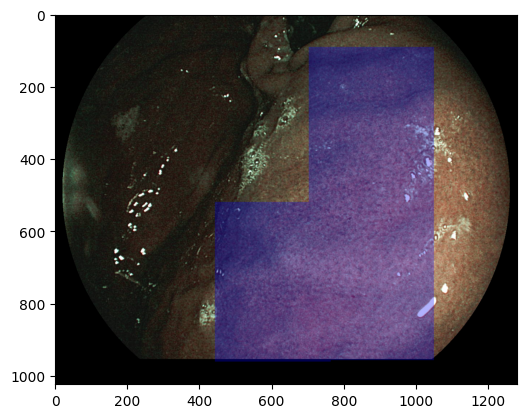

In [ ]:
plt.imshow(overlayed)

In [ ]:
patches = split_image_into_patches(result_image, 4, 5)
mask_patches = split_image_into_patches(mask_matrix, 4, 5)

1024 1280 4 5
1024 1280 4 5


In [ ]:
def get_class(mask_patch, threshold=0.05, n_classes=3):
  percs = np.array([(mask_patch==c).mean() for c in range(n_classes)])
  if percs[0] > 1-threshold:
    return 0
  return 1+percs[1:].argmax()

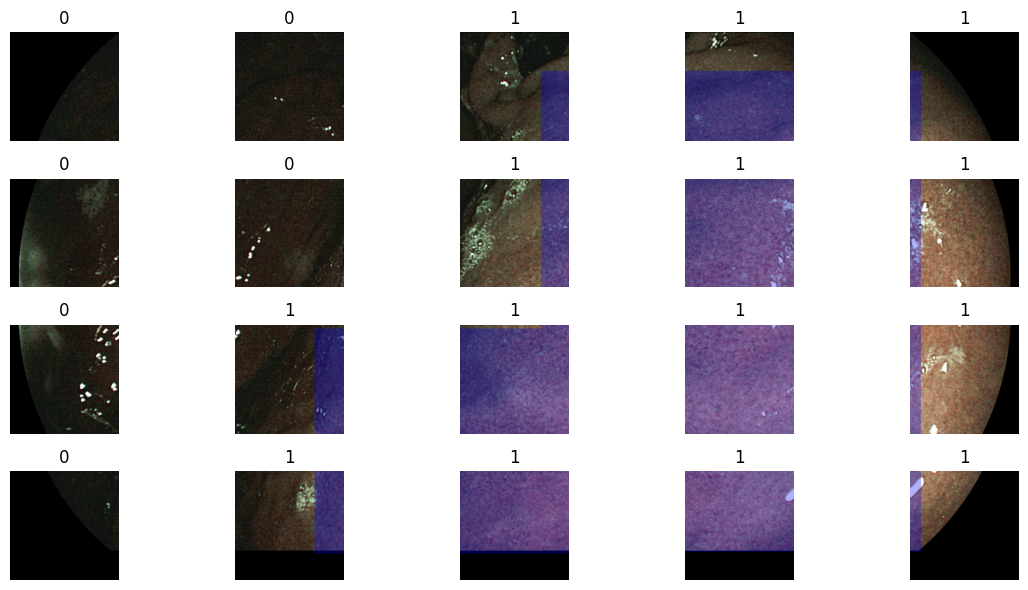

In [ ]:
# Plot the original and resulting images
fig, axes = plt.subplots(4, 5, figsize=(12, 6))

for i, ax in enumerate(axes.reshape(-1)):
    ax.axis('off')
    ax.imshow(overlay_mask(patches[i], mask_patches[i]))
    ax.set_title(str(get_class(mask_patches[i])))

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

In [ ]:
!rm -rf custom_dataset

In [ ]:
from PIL import Image
import tqdm
import os

# Supponendo che 'ImgDataset' sia definito in un altro modulo che hai già importato
d = ImgDataset('train')

# Creazione delle directory se non esistono già
os.makedirs('custom_dataset/train', exist_ok=True)

# Iterazione sugli elementi del dataset con una barra di progresso
for i, (image_matrix, mask_matrix) in tqdm.tqdm(enumerate(d)):
    mask_matrix = mask_matrix[:, :, 0]
    center = (image_matrix.shape[1] // 2, image_matrix.shape[0] // 2 - 25)
    radius = 620
    image_matrix = apply_circular_mask(image_matrix, center, radius)
    patches = split_image_into_patches(image_matrix, 4, 5)
    mask_patches = split_image_into_patches(mask_matrix, 4, 5)

    for j, (p, mp) in enumerate(zip(patches, mask_patches)):
        c = get_class(mp)
        os.makedirs(f'custom_dataset/train/{c}', exist_ok=True)
        Image.fromarray(p).save(f'custom_dataset/train/{c}/{i}_{j}.jpg')


0it [00:00, ?it/s]

1024 1280 4 5
1024 1280 4 5


1it [00:00,  2.90it/s]

1024 1280 4 5
1024 1280 4 5


2it [00:00,  3.12it/s]

1024 1280 4 5
1024 1280 4 5


3it [00:00,  3.32it/s]

1024 1280 4 5
1024 1280 4 5


4it [00:01,  3.30it/s]

1024 1280 4 5
1024 1280 4 5


5it [00:01,  3.41it/s]

1024 1280 4 5
1024 1280 4 5


6it [00:01,  3.42it/s]

1024 1280 4 5
1024 1280 4 5


7it [00:02,  3.39it/s]

1024 1280 4 5
1024 1280 4 5


8it [00:02,  3.42it/s]

1024 1280 4 5
1024 1280 4 5


9it [00:02,  3.48it/s]

1024 1280 4 5
1024 1280 4 5


10it [00:02,  3.44it/s]

1024 1280 4 5
1024 1280 4 5


11it [00:03,  3.50it/s]

1024 1280 4 5
1024 1280 4 5


12it [00:03,  3.47it/s]

1024 1280 4 5
1024 1280 4 5


13it [00:03,  3.40it/s]

1024 1280 4 5
1024 1280 4 5


14it [00:04,  3.43it/s]

1024 1280 4 5
1024 1280 4 5


15it [00:04,  3.39it/s]

1024 1280 4 5
1024 1280 4 5


16it [00:04,  3.45it/s]

1024 1280 4 5
1024 1280 4 5


17it [00:05,  3.37it/s]

1024 1280 4 5
1024 1280 4 5


18it [00:05,  3.31it/s]

1024 1280 4 5
1024 1280 4 5


19it [00:05,  3.37it/s]

1024 1280 4 5
1024 1280 4 5


20it [00:05,  3.34it/s]

1024 1280 4 5
1024 1280 4 5


21it [00:06,  3.28it/s]

1024 1280 4 5
1024 1280 4 5


22it [00:06,  3.37it/s]

1024 1280 4 5
1024 1280 4 5


23it [00:06,  3.26it/s]

1024 1280 4 5
1024 1280 4 5


24it [00:07,  3.30it/s]

1024 1280 4 5
1024 1280 4 5


25it [00:07,  3.36it/s]


In [ ]:
help(Image.fromarray(patches[7]).save)

Help on method save in module PIL.Image:

save(fp, format=None, **params) method of PIL.Image.Image instance
    Saves this image under the given filename.  If no format is
    specified, the format to use is determined from the filename
    extension, if possible.
    
    Keyword options can be used to provide additional instructions
    to the writer. If a writer doesn't recognise an option, it is
    silently ignored. The available options are described in the
    :doc:`image format documentation
    <../handbook/image-file-formats>` for each writer.
    
    You can use a file object instead of a filename. In this case,
    you must always specify the format. The file object must
    implement the ``seek``, ``tell``, and ``write``
    methods, and be opened in binary mode.
    
    :param fp: A filename (string), pathlib.Path object or file object.
    :param format: Optional format override.  If omitted, the
       format to use is determined from the filename extension.
       I

# Harmonic network

In [ ]:
!git clone https://github.com/lorenzobrigato/gem.git
%cd gem

fatal: destination path 'gem' already exists and is not an empty directory.
/content/gdrive/MyDrive/Napoli Elective/GASTRIC_METAPLASIA/gem


In [ ]:
!pip install -r gem/requirements.txt
# You might need to install PyTorch compatible with Colab's CUDA version
# For example, if you need a specific version of PyTorch:
#!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'gem/requirements.txt'


In [ ]:
import sys
import os

# Navigate to the folder just above 'gem'
os.chdir('/content/gdrive/MyDrive/Napoli Elective/GASTRIC_METAPLASIA/gem')  # Adjust if necessary

# Add this directory to sys.path
sys.path.append('/content/gdrive/MyDrive/Napoli Elective/GASTRIC_METAPLASIA')  # This is the parent directory of 'gem'

# Now try importing your module
from gem.pipelines.harmonic import HarmonicClassifier, HarmonicModel


In [ ]:
!ls

bash_scripts  datasets	gem  README.md	requirements.txt  scripts


In [ ]:
import torch
# Example: Initialize the HarmonicClassifier with a corrected architecture
harmonic_classifier = HarmonicClassifier()
model = harmonic_classifier.create_model(arch='wrn-28-10', num_classes=10, input_channels=3)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [ ]:
import torch.optim as optim
# Loss function
criterion = torch.nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [ ]:
!pip install torchvision

In [ ]:
from torchvision import transforms

# Define your transformations
transform = transforms.Compose([
    #transforms.Resize((256, 256)),  # Resize images to fit the model input
    transforms.ToTensor(),  # Convert images to Tensor
    #transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Standard normalization for pre-trained models
                         #std=[0.229, 0.224, 0.225])
])

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Load the dataset
dataset = ImageFolder(root='/content/gdrive/MyDrive/Napoli Elective/GASTRIC_METAPLASIA/custom_dataset/train', transform=transform)

# Create a DataLoader
train_loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)

In [ ]:
num_epochs = 10  # Set the number of epochs

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU if available

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    print(f'Epoch {epoch+1}: Loss = {loss.item()}')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
